In [5]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.maxcolumns',20)
pd.set_option('display.maxrows',25)

NameError: name 'warnings' is not defined

In [6]:
responses = pd.read_csv('../Niteo/Emergency_Response_Incidents.csv')

In [7]:
responses.head()

,Incident Type,Location,Borough,Creation Date,Closed Date,Latitude,Longitude
0,Administration-Other,NaN,Brooklyn,12/31/2015 11:52:18 PM,1/1/2016 1:32:08AM,NaN,NaN
1,Transportation-Train Subway,Marcy Ave & Broadway,Brooklyn,12/31/2015 5:00:43 PM,1/2/2016 4:03:10AM,40.708426,-73.957904
2,Law Enforcement-Suspicious Package,435 Ocean Parkway,Brooklyn,12/30/2015 1:55:21 PM,12/30/2015 2:00:18PM,40.637832,-73.973045
3,Fire-Manhole,NaN,Bronx,12/29/2015 1:57:37 PM,12/30/2015 2:47:14AM,40.733883,-74.031169
4,Fire-2nd Alarm,347 East 84 Street,Manhattan,12/28/2015 6:52:05 PM,12/28/2015 8:40:08PM,40.776093,-73.951568


In [6]:
responses['Creation Date'].describe()

count                      2524
unique                     2521
top       5/11/2015  7:48:03 PM
freq                          2
Name: Creation Date, dtype: object

In [8]:
responses = responses.rename(columns={'Creation Date':'SDate','Closed Date':'EDate','Incident Type':'Incidents'})

In [65]:
responses.head()

,Incidents,Location,Borough,SDate,EDate,Latitude,Longitude
0,Administration,NaN,brooklyn,12/31/2015 11:52:18 PM,1/1/2016 1:32:08AM,NaN,NaN
1,Transportation,Marcy Ave & Broadway,brooklyn,12/31/2015 5:00:43 PM,1/2/2016 4:03:10AM,40.708426,-73.957904
2,Law Enforcement,435 Ocean Parkway,brooklyn,12/30/2015 1:55:21 PM,12/30/2015 2:00:18PM,40.637832,-73.973045
3,Fire,NaN,bronx,12/29/2015 1:57:37 PM,12/30/2015 2:47:14AM,40.733883,-74.031169
4,Fire,347 East 84 Street,manhattan,12/28/2015 6:52:05 PM,12/28/2015 8:40:08PM,40.776093,-73.951568


In [66]:
responses['Borough']=responses.Borough.apply(lambda x:x.lower())

In [67]:
responses.head()

,Incidents,Location,Borough,SDate,EDate,Latitude,Longitude
0,Administration,NaN,brooklyn,12/31/2015 11:52:18 PM,1/1/2016 1:32:08AM,NaN,NaN
1,Transportation,Marcy Ave & Broadway,brooklyn,12/31/2015 5:00:43 PM,1/2/2016 4:03:10AM,40.708426,-73.957904
2,Law Enforcement,435 Ocean Parkway,brooklyn,12/30/2015 1:55:21 PM,12/30/2015 2:00:18PM,40.637832,-73.973045
3,Fire,NaN,bronx,12/29/2015 1:57:37 PM,12/30/2015 2:47:14AM,40.733883,-74.031169
4,Fire,347 East 84 Street,manhattan,12/28/2015 6:52:05 PM,12/28/2015 8:40:08PM,40.776093,-73.951568


In [68]:
responses['Borough'].describe()

count          2524
unique            6
top       manhattan
freq            918
Name: Borough, dtype: object

In [69]:
def cleaninc(x):
    x=x.split('-')
    return x[0]
responses['Incidents']=responses.Incidents.apply(cleaninc)

In [70]:
responses.head()

,Incidents,Location,Borough,SDate,EDate,Latitude,Longitude
0,Administration,NaN,brooklyn,12/31/2015 11:52:18 PM,1/1/2016 1:32:08AM,NaN,NaN
1,Transportation,Marcy Ave & Broadway,brooklyn,12/31/2015 5:00:43 PM,1/2/2016 4:03:10AM,40.708426,-73.957904
2,Law Enforcement,435 Ocean Parkway,brooklyn,12/30/2015 1:55:21 PM,12/30/2015 2:00:18PM,40.637832,-73.973045
3,Fire,NaN,bronx,12/29/2015 1:57:37 PM,12/30/2015 2:47:14AM,40.733883,-74.031169
4,Fire,347 East 84 Street,manhattan,12/28/2015 6:52:05 PM,12/28/2015 8:40:08PM,40.776093,-73.951568


In [71]:
responses = responses.replace(['LawEnforcment'],['Law Enforcement'])

In [72]:
test = responses.loc[0::,['Borough','SDate','EDate']]

In [73]:
test.head()

,Borough,SDate,EDate
0,brooklyn,12/31/2015 11:52:18 PM,1/1/2016 1:32:08AM
1,brooklyn,12/31/2015 5:00:43 PM,1/2/2016 4:03:10AM
2,brooklyn,12/30/2015 1:55:21 PM,12/30/2015 2:00:18PM
3,bronx,12/29/2015 1:57:37 PM,12/30/2015 2:47:14AM
4,manhattan,12/28/2015 6:52:05 PM,12/28/2015 8:40:08PM


In [74]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 3 columns):
Borough    2524 non-null object
SDate      2524 non-null object
EDate      2524 non-null object
dtypes: object(3)
memory usage: 59.2+ KB


In [75]:
test['SDate'] = pd.to_datetime(test.SDate)


In [64]:
test['EDate'] = pd.to_datetime(test.EDate)

TypeError: unhashable type: 'list'

In [76]:
test['STime']=test.SDate.dt.time

In [77]:
test.head()

,Borough,SDate,EDate,STime
0,brooklyn,2015-12-31 23:52:18,1/1/2016 1:32:08AM,23:52:18
1,brooklyn,2015-12-31 17:00:43,1/2/2016 4:03:10AM,17:00:43
2,brooklyn,2015-12-30 13:55:21,12/30/2015 2:00:18PM,13:55:21
3,bronx,2015-12-29 13:57:37,12/30/2015 2:47:14AM,13:57:37
4,manhattan,2015-12-28 18:52:05,12/28/2015 8:40:08PM,18:52:05


In [78]:
test.sample(20)

,Borough,SDate,EDate,STime
854,brooklyn,2015-02-20 16:46:00,2/20/2015 10:20:04PM,16:46:00
1275,manhattan,2014-08-29 14:45:23,9/9/2014 1:01:28PM,14:45:23
1834,manhattan,2013-12-20 10:34:06,12/20/2013 11:17:50AM,10:34:06
2278,bronx,2013-05-23 17:54:03,5/23/2013 6:37:40PM,17:54:03
758,brooklyn,2015-03-16 14:37:41,3/16/2015 4:41:22PM,14:37:41
137,manhattan,2015-11-07 09:36:43,11/7/2015 10:42:28AM,09:36:43
2217,brooklyn,2013-06-24 11:21:52,6/24/2013 1:40:22PM,11:21:52
811,queens,2015-03-04 08:20:38,3/6/2015 12:05:49PM,08:20:38
1783,brooklyn,2014-01-06 17:20:30,1/6/2014 7:12:24PM,17:20:30
450,bronx,2015-06-30 03:43:34,6/30/2015 5:22:00AM,03:43:34


In [80]:
test.head()

,Borough,SDate,EDate,STime
0,brooklyn,2015-12-31 23:52:18,1/1/2016 1:32:08AM,23:52:18
1,brooklyn,2015-12-31 17:00:43,1/2/2016 4:03:10AM,17:00:43
2,brooklyn,2015-12-30 13:55:21,12/30/2015 2:00:18PM,13:55:21
3,bronx,2015-12-29 13:57:37,12/30/2015 2:47:14AM,13:57:37
4,manhattan,2015-12-28 18:52:05,12/28/2015 8:40:08PM,18:52:05


In [110]:
def splitdate(x):
    x=x.split('   ')
    return x[-1]
test['ETime']=responses.EDate.apply(splitdate)

In [111]:
test.head()

,Borough,SDate,EDate,STime,ETime
0,brooklyn,2015-12-31 23:52:18,1/1/2016 1:32:08AM,23:52:18,1:32:08AM
1,brooklyn,2015-12-31 17:00:43,1/2/2016 4:03:10AM,17:00:43,4:03:10AM
2,brooklyn,2015-12-30 13:55:21,12/30/2015 2:00:18PM,13:55:21,2:00:18PM
3,bronx,2015-12-29 13:57:37,12/30/2015 2:47:14AM,13:57:37,2:47:14AM
4,manhattan,2015-12-28 18:52:05,12/28/2015 8:40:08PM,18:52:05,8:40:08PM


In [121]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 5 columns):
Borough    2524 non-null object
SDate      2524 non-null datetime64[ns]
EDate      2524 non-null object
STime      2524 non-null object
ETime      2524 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 98.7+ KB


In [136]:
test.EDate = pd.to_datetime(test.EDate,format='%m/%d/%Y %I:%M:%S%p')

ValueError: unconverted data remains:  

In [133]:
test.EDate.apply(lambda x: len(x)).head()

0    21
1    21
2    23
3    23
4    23
Name: EDate, dtype: int64

In [134]:
test.EDate.head()

0      1/1/2016   1:32:08AM 
1      1/2/2016   4:03:10AM 
2    12/30/2015   2:00:18PM 
3    12/30/2015   2:47:14AM 
4    12/28/2015   8:40:08PM 
Name: EDate, dtype: object

In [138]:
import datetime as dt

In [139]:
now = dt.datetime.now()

In [140]:
now

datetime.datetime(2016, 6, 3, 12, 16, 46, 876000)

In [141]:
test.head()

,Borough,SDate,EDate,STime,ETime
0,brooklyn,2015-12-31 23:52:18,1/1/2016 1:32:08AM,23:52:18,1:32:08AM
1,brooklyn,2015-12-31 17:00:43,1/2/2016 4:03:10AM,17:00:43,4:03:10AM
2,brooklyn,2015-12-30 13:55:21,12/30/2015 2:00:18PM,13:55:21,2:00:18PM
3,bronx,2015-12-29 13:57:37,12/30/2015 2:47:14AM,13:57:37,2:47:14AM
4,manhattan,2015-12-28 18:52:05,12/28/2015 8:40:08PM,18:52:05,8:40:08PM


In [142]:
del test['ETime']

In [143]:
test.head()

,Borough,SDate,EDate,STime
0,brooklyn,2015-12-31 23:52:18,1/1/2016 1:32:08AM,23:52:18
1,brooklyn,2015-12-31 17:00:43,1/2/2016 4:03:10AM,17:00:43
2,brooklyn,2015-12-30 13:55:21,12/30/2015 2:00:18PM,13:55:21
3,bronx,2015-12-29 13:57:37,12/30/2015 2:47:14AM,13:57:37
4,manhattan,2015-12-28 18:52:05,12/28/2015 8:40:08PM,18:52:05


In [144]:
now = str(now)

In [145]:
now

'2016-06-03 12:16:46.876000'

In [148]:
test['EDate']=test.EDate.apply(lambda x:x if x!='Active' else now)

In [149]:
test['EDate']=pd.to_datetime(test.EDate)

In [150]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 4 columns):
Borough    2524 non-null object
SDate      2524 non-null datetime64[ns]
EDate      2524 non-null datetime64[ns]
STime      2524 non-null object
dtypes: datetime64[ns](2), object(2)
memory usage: 78.9+ KB


In [153]:
test['numDays']=abs(test['SDate']-test['EDate'])

In [154]:
test.head()

,Borough,SDate,EDate,STime,numDays
0,brooklyn,2015-12-31 23:52:18,2016-01-01 01:32:08,23:52:18,0 days 01:39:50
1,brooklyn,2015-12-31 17:00:43,2016-01-02 04:03:10,17:00:43,1 days 11:02:27
2,brooklyn,2015-12-30 13:55:21,2015-12-30 14:00:18,13:55:21,0 days 00:04:57
3,bronx,2015-12-29 13:57:37,2015-12-30 02:47:14,13:57:37,0 days 12:49:37
4,manhattan,2015-12-28 18:52:05,2015-12-28 20:40:08,18:52:05,0 days 01:48:03


In [171]:
test.head()

,Borough,SDate,EDate,STime,numDays
0,brooklyn,2015-12-31 23:52:18,2016-01-01 01:32:08,23:52:18,0 days 01:39:50
1,brooklyn,2015-12-31 17:00:43,2016-01-02 04:03:10,17:00:43,1 days 11:02:27
2,brooklyn,2015-12-30 13:55:21,2015-12-30 14:00:18,13:55:21,0 days 00:04:57
3,bronx,2015-12-29 13:57:37,2015-12-30 02:47:14,13:57:37,0 days 12:49:37
4,manhattan,2015-12-28 18:52:05,2015-12-28 20:40:08,18:52:05,0 days 01:48:03


In [172]:
test['numDays']= pd.to_timedelta(test.numDays)

In [173]:
test.head()

,Borough,SDate,EDate,STime,numDays
0,brooklyn,2015-12-31 23:52:18,2016-01-01 01:32:08,23:52:18,0 days 01:39:50
1,brooklyn,2015-12-31 17:00:43,2016-01-02 04:03:10,17:00:43,1 days 11:02:27
2,brooklyn,2015-12-30 13:55:21,2015-12-30 14:00:18,13:55:21,0 days 00:04:57
3,bronx,2015-12-29 13:57:37,2015-12-30 02:47:14,13:57:37,0 days 12:49:37
4,manhattan,2015-12-28 18:52:05,2015-12-28 20:40:08,18:52:05,0 days 01:48:03


In [174]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 5 columns):
Borough    2524 non-null object
SDate      2524 non-null datetime64[ns]
EDate      2524 non-null datetime64[ns]
STime      2524 non-null object
numDays    2524 non-null timedelta64[ns]
dtypes: datetime64[ns](2), object(2), timedelta64[ns](1)
memory usage: 98.7+ KB


In [175]:
test['numDays']=pd.Timedelta(test.numDays).days

ValueError: Value must be Timedelta, string, integer, float, timedelta or convertible

In [177]:
test['numDays']=test['numDays'].apply(lambda x: x / np.timedelta64(1,'D'))

In [178]:
test.head()

,Borough,SDate,EDate,STime,numDays
0,brooklyn,2015-12-31 23:52:18,2016-01-01 01:32:08,23:52:18,0.069329
1,brooklyn,2015-12-31 17:00:43,2016-01-02 04:03:10,17:00:43,1.460035
2,brooklyn,2015-12-30 13:55:21,2015-12-30 14:00:18,13:55:21,0.003438
3,bronx,2015-12-29 13:57:37,2015-12-30 02:47:14,13:57:37,0.534456
4,manhattan,2015-12-28 18:52:05,2015-12-28 20:40:08,18:52:05,0.075035


In [179]:
testDay = test.loc[0::,['Borough','numDays']]

In [180]:
testDay.head()

,Borough,numDays
0,brooklyn,0.069329
1,brooklyn,1.460035
2,brooklyn,0.003438
3,bronx,0.534456
4,manhattan,0.075035


In [203]:
grpDay = testDay.groupby(['Borough'])

In [204]:
testDay.describe()

,numDays
count,2524.000000
mean,3.495225
std,17.378128
min,0.000000
25%,0.055058
50%,0.128304
75%,0.580648
max,337.087002


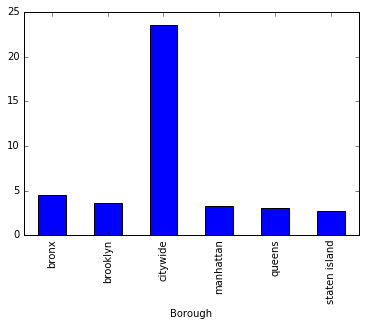

In [212]:
grpDay['numDays'].mean().plot(kind='bar')

In [207]:
grpDay['numDays'].mean()

Borough
bronx             4.500459
brooklyn          3.605757
citywide         23.530557
manhattan         3.279218
queens            3.012365
staten island     2.699316
Name: numDays, dtype: float64

In [209]:
grpDay['numDays'].describe()

Borough             
bronx          count    318.000000
               mean       4.500459
               std       21.007651
               min        0.006736
               25%        0.072193
               50%        0.172951
               75%        0.757260
               max      186.003899
brooklyn       count    678.000000
               mean       3.605757
               std       18.512375
               min        0.000000
               25%        0.057896
               50%        0.127089
               75%        0.583895
               max      304.194339
citywide       count      7.000000
               mean      23.530557
               std       29.830245
               min        0.488843
               25%        2.401007
               50%       13.440903
               75%       30.952072
               max       84.077998
manhattan      count    918.000000
               mean       3.279218
               std       17.260665
               min        0.000000

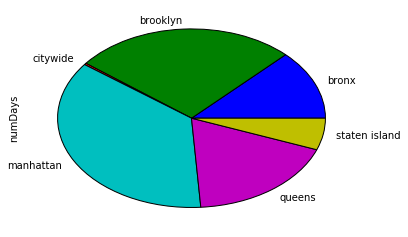

In [217]:
grpDay['numDays'].count().plot(kind='pie')

In [218]:
responses.head()

,Incidents,Location,Borough,SDate,EDate,Latitude,Longitude
0,Administration,NaN,brooklyn,12/31/2015 11:52:18 PM,1/1/2016 1:32:08AM,NaN,NaN
1,Transportation,Marcy Ave & Broadway,brooklyn,12/31/2015 5:00:43 PM,1/2/2016 4:03:10AM,40.708426,-73.957904
2,Law Enforcement,435 Ocean Parkway,brooklyn,12/30/2015 1:55:21 PM,12/30/2015 2:00:18PM,40.637832,-73.973045
3,Fire,NaN,bronx,12/29/2015 1:57:37 PM,12/30/2015 2:47:14AM,40.733883,-74.031169
4,Fire,347 East 84 Street,manhattan,12/28/2015 6:52:05 PM,12/28/2015 8:40:08PM,40.776093,-73.951568


In [219]:
testDay2 = testDay[testDay.Borough != 'citywide']

In [220]:
testDay2.sample(20)

,Borough,numDays,mean
1512,queens,1.125856,<bound method SeriesGroupBy.mean of <pandas.co...
2399,brooklyn,0.038368,<bound method SeriesGroupBy.mean of <pandas.co...
1825,brooklyn,7.346956,<bound method SeriesGroupBy.mean of <pandas.co...
214,queens,3.650891,<bound method SeriesGroupBy.mean of <pandas.co...
326,queens,0.227917,<bound method SeriesGroupBy.mean of <pandas.co...
1972,manhattan,0.073970,<bound method SeriesGroupBy.mean of <pandas.co...
2237,queens,0.952870,<bound method SeriesGroupBy.mean of <pandas.co...
2222,manhattan,0.957419,<bound method SeriesGroupBy.mean of <pandas.co...
366,manhattan,0.040903,<bound method SeriesGroupBy.mean of <pandas.co...
2118,manhattan,0.053229,<bound method SeriesGroupBy.mean of <pandas.co...


In [221]:
del testDay2['mean']

In [222]:
testDay2.sample(20)

,Borough,numDays
1258,manhattan,0.038507
2293,manhattan,0.028542
753,queens,9.858611
91,bronx,0.006736
892,queens,0.051400
1764,manhattan,13.193854
1372,manhattan,0.324236
1250,queens,0.581725
1628,brooklyn,0.041933
1003,manhattan,1.571829


In [224]:
grpDay2 = testDay2.groupby(['Borough'])

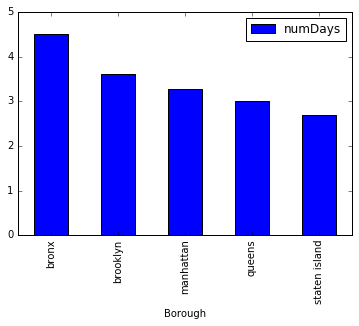

In [227]:
grpDay2.mean().plot(kind='bar')

In [228]:
borMean = grpDay2.mean()

In [229]:
borMean

,numDays
Borough,
bronx,4.500459
brooklyn,3.605757
manhattan,3.279218
queens,3.012365
staten island,2.699316


In [231]:
borMean['Area']=''

In [232]:
borMean

,numDays,Area
Borough,,
bronx,4.500459,
brooklyn,3.605757,
manhattan,3.279218,
queens,3.012365,
staten island,2.699316,


In [241]:
borMean['Area'][0]=42

C:\Users\amuthiyan\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [236]:
borMean

,numDays,Area,"(Area, bronx)"
Borough,,,
bronx,4.500459,42,42
brooklyn,3.605757,42,42
manhattan,3.279218,42,42
queens,3.012365,42,42
staten island,2.699316,42,42


In [238]:
del borMean['Area','bronx']

In [239]:
borMean

,numDays,Area
Borough,,
bronx,4.500459,42
brooklyn,3.605757,42
manhattan,3.279218,42
queens,3.012365,42
staten island,2.699316,42


In [7]:
responses.head()

,Incident Type,Location,Borough,Creation Date,Closed Date,Latitude,Longitude
0,Administration-Other,NaN,Brooklyn,12/31/2015 11:52:18 PM,1/1/2016 1:32:08AM,NaN,NaN
1,Transportation-Train Subway,Marcy Ave & Broadway,Brooklyn,12/31/2015 5:00:43 PM,1/2/2016 4:03:10AM,40.708426,-73.957904
2,Law Enforcement-Suspicious Package,435 Ocean Parkway,Brooklyn,12/30/2015 1:55:21 PM,12/30/2015 2:00:18PM,40.637832,-73.973045
3,Fire-Manhole,NaN,Bronx,12/29/2015 1:57:37 PM,12/30/2015 2:47:14AM,40.733883,-74.031169
4,Fire-2nd Alarm,347 East 84 Street,Manhattan,12/28/2015 6:52:05 PM,12/28/2015 8:40:08PM,40.776093,-73.951568


In [8]:
responses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 7 columns):
Incident Type    2524 non-null object
Location         2295 non-null object
Borough          2524 non-null object
Creation Date    2524 non-null object
Closed Date      2524 non-null object
Latitude         2238 non-null float64
Longitude        2238 non-null float64
dtypes: float64(2), object(5)
memory usage: 138.1+ KB


In [9]:
df=responses.copy()

In [10]:
df.head()

,Incident Type,Location,Borough,Creation Date,Closed Date,Latitude,Longitude
0,Administration-Other,NaN,Brooklyn,12/31/2015 11:52:18 PM,1/1/2016 1:32:08AM,NaN,NaN
1,Transportation-Train Subway,Marcy Ave & Broadway,Brooklyn,12/31/2015 5:00:43 PM,1/2/2016 4:03:10AM,40.708426,-73.957904
2,Law Enforcement-Suspicious Package,435 Ocean Parkway,Brooklyn,12/30/2015 1:55:21 PM,12/30/2015 2:00:18PM,40.637832,-73.973045
3,Fire-Manhole,NaN,Bronx,12/29/2015 1:57:37 PM,12/30/2015 2:47:14AM,40.733883,-74.031169
4,Fire-2nd Alarm,347 East 84 Street,Manhattan,12/28/2015 6:52:05 PM,12/28/2015 8:40:08PM,40.776093,-73.951568
